<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 花式索引(Fancy Indexing)

Fancy indexing就像是之前看過的單純索引，但是傳遞索引的陣列不是單一的純量。這可以讓我們非常快速存取和修改一個陣列值中的複雜子集合

## 探索Fancy索引

Fancy索引傳遞一個陣列作為索引，以一次存取多個陣列元素。

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


假設想要取得3個不同元素，可以操作如下:

In [ ]:
[x[3], x[7], x[2]]

[71, 86, 14]

另一個方法是可以傳遞串列或索引陣列去取得同樣的結果:

In [ ]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

當使用fancy索引時，產生結果的陣列形狀，反映了索引陣列的形狀，而不是*被索引的陣列形狀*

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy索引也可以運作在多個維度，參考以下的陣列:

In [ ]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

就像是標準的索引，第1個索引參考到列，第2個索引則是欄:

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

第1個值是`X[0, 2]`,第2個值是`X[1, 1]`,第3個值是`X[2, 3]`。
Fancy索引的規則遵守先前提過的Broadcasting的規則。

所以，如果在索引中結合了欄向量和列向量，可以得到一個二維的結果:

In [ ]:
# 在row增加column方向的數值
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## 索引的組合運用

Fancy索引可以被結合到之前看過的索引機制，進行更具威力的操作:

In [ ]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


結合Fancy和簡單索引:

In [ ]:
# 取第2 row的第2, 0, 1column
X[2, [2, 0, 1]]

array([10,  8,  9])

結合fancy索引和切片(slicing):

In [ ]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

這些索引的組合選項都可以讓存取和修改陣列值，在操作非常具有彈性。

## 例如:選擇隨機點

Fancy索引常用的地方是從一個矩陣中選取一個子集合。

例如:假設有一個NxD的矩陣用來表示在D維度上的N個點，就像是下面這些從一個二維常態分布中取出的點:

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100) # 生成一個常態分布的矩陣
X.shape

(100, 2)

In [ ]:
print(X)

[[-0.644508   -0.46220608]
 [ 0.7376352   1.21236921]
 [ 0.88151763  1.12795177]
 [ 2.04998983  5.97778598]
 [-0.1711348  -2.06258746]
 [ 0.67956979  0.83705124]
 [ 1.46860232  1.22961093]
 [ 0.35282131  1.49875397]
 [-2.51552505 -5.64629995]
 [ 0.0843329  -0.3543059 ]
 [ 0.19199272  1.48901291]
 [-0.02566217 -0.74987887]
 [ 1.00569227  2.25287315]
 [ 0.49514263  1.18939673]
 [ 0.0629872   0.57349278]
 [ 0.75093031  2.99487004]
 [-3.0236127  -6.00766046]
 [-0.53943081 -0.3478899 ]
 [ 1.53817376  1.99973464]
 [-0.50886808 -1.81099656]
 [ 1.58115602  2.86410319]
 [ 0.99305043  2.54294059]
 [-0.87753796 -1.15767204]
 [-1.11518048 -1.87508012]
 [ 0.4299908   0.36324254]
 [ 0.97253528  3.53815717]
 [ 0.32124996  0.33137032]
 [-0.74618649 -2.77366681]
 [-0.88473953 -1.81495444]
 [ 0.98783862  2.30280401]
 [-1.2033623  -2.04402725]
 [-1.51101746 -3.2818741 ]
 [-2.76337717 -7.66760648]
 [ 0.39158553  0.87949228]
 [ 0.91181024  3.32968944]
 [-0.84202629 -2.01226547]
 [ 1.06586877  0.95500019]
 

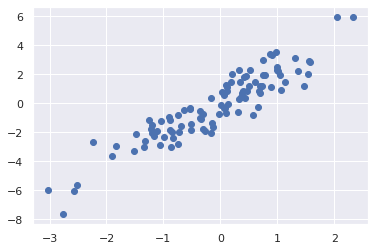

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

用Fancy索引來選取20個隨機點。
首先選用20個不重複的亂數索引，然後使用這些索引去取得原始陣列的一個部分

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([99, 65, 86, 80, 10, 26, 17, 70, 78,  8, 73, 77, 92, 24, 85, 58, 30,
       81, 83, 21])

In [ ]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

用比較大的圓形疊到被選到的點的位置上:

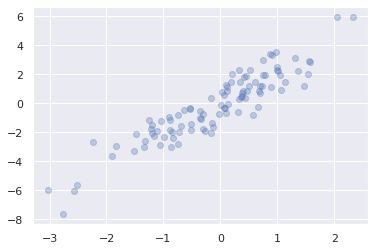

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) # alpha:透明度，介於0~1

## 使用Fancy索引修改陣列值

Fancy索引可以用來取得部分陣列一樣，也可以被用來修改部分的陣列

In [ ]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


也可以使用任一設定值運算子來做這件事

In [ ]:
x[i] -= 10 # x[i] = x[i] - 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


要注意的是，這些運算的重複索引會引發一些潛在未知預期的結果

In [ ]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4跑去哪裡了? 這個運算首先指定`x[0] = 4`, 接著是`x[0] = 6`.
因此最後結果當然會是6

這很合理，但考慮以下的運算:

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 # x[i] = x[i] + 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

可能會有人覺得應該是`x[3]`為2, `x[4]`為3, 這是每個索引被重複的次數。為什麼不是這樣? 概念上，這是因為`x[i] += 1`是`x[i] = x[i] + 1`的簡寫. `x[i] + 1`被計算了之後，這個結果被指定到了x的索引，因為這樣，它並不會因為發生多次計算而被提高，但是這個設定動作，會導致最終部直覺的結果



如果要當運算被重複時的另一種行為，可以使用ufuncs的`at()` 

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


`at()`方法讓運算子對指引的索引(在此為`i`)與指定的值(在此為1)，在同一位置套用給定的運算。
